In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-06-01 12:50:39.879210: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


# Split df into endurance and the rest

In [7]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
with open(data_dir + 'in_situ_obs_with_ascat_params_9000_images.pickle', 'rb') as handle:
    ascat_dict = pickle.load(handle)

In [8]:
lat_endurance = ascat_dict['Irminger_6']['lat'][0]
lat_endurance

59.9337

In [9]:
lon_endurance = ascat_dict['Irminger_6']['lon'][0]
lon_endurance

-39.47378

In [10]:
df['lat']

0        44.6393
1        44.6393
2        44.6393
3        44.6393
4        44.6393
          ...   
10195    59.9337
10196    59.9337
10197    59.9337
10198    59.9337
10199    59.9337
Name: lat, Length: 10200, dtype: float64

In [11]:
endurance_df = df.loc[((df['lat'] == lat_endurance) & (df['lon'] == lon_endurance))]
endurance_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
2627,-0.018460,-0.016810,334.940001,2480.763226,1018.546862,1019.781006,6.113972,6.132783,91.661900,91.627786,...,-148.399994,-103.110001,-57.829998,36.809998,27.510000,36.730000,20160710T220000Z,20160710T234158.125000Z,-2.566008,1.626250
2628,-0.039184,-0.001027,336.050002,2480.926624,1018.630092,1019.864502,6.115803,6.134413,91.928799,91.893171,...,-148.399994,-103.110001,-57.829998,36.809998,27.510000,36.730000,20160710T220000Z,20160710T234158.125000Z,-2.596338,1.365124
2629,0.033513,-0.097799,333.145001,2480.649068,1018.691716,1019.927496,5.966582,5.980455,91.286850,91.346936,...,55.649998,101.389999,147.020004,46.489998,35.770000,46.489998,20160711T123000Z,20160711T140858.125000Z,-2.105626,0.999984
2630,-0.019325,-0.066719,338.820001,2480.392111,1018.762764,1019.997485,6.066487,6.079870,91.280900,91.334544,...,55.649998,101.389999,147.020004,46.489998,35.770000,46.489998,20160711T123000Z,20160711T140858.125000Z,-1.809334,1.005803
2631,-0.005291,-0.025155,334.775002,2480.005083,1018.764022,1019.997482,6.155759,6.166774,90.883350,90.949864,...,55.649998,101.389999,147.020004,46.489998,35.770000,46.489998,20160711T123000Z,20160711T140858.125000Z,-1.701237,0.841418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [12]:
not_endurance_df = df.loc[~((df['lat'] == lat_endurance) & (df['lon'] == lon_endurance))]
not_endurance_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9480,-0.120886,-0.205319,330.230000,2481.329336,1015.473704,1016.707986,5.542659,5.581667,90.589849,90.521463,...,-27.289999,-72.139999,-116.939995,41.279999,31.369999,41.270000,20190118T145100Z,20190118T163258.125000Z,-3.773566,-2.634484
9481,-0.135043,-0.212356,325.810001,2482.154959,1016.258730,1017.502997,4.446443,4.498458,83.074749,82.783827,...,-144.179993,-98.000000,-51.789997,63.389999,51.919998,63.289997,20190119T010000Z,20190119T024158.125000Z,4.280636,-2.892473
9482,-0.184694,-0.085406,326.299998,2482.132121,1016.589339,1017.833002,4.451336,4.505584,81.943449,81.599753,...,-144.179993,-98.000000,-51.789997,63.389999,51.919998,63.289997,20190119T010000Z,20190119T024158.125000Z,5.093024,-3.275594
9483,-0.000651,-0.231066,212.345000,2482.411651,1030.922939,1032.223492,1.852644,2.094365,68.787000,65.156515,...,-24.900000,-69.680000,-114.509995,59.029999,47.930000,59.090000,20190122T150900Z,20190122T164758.125000Z,6.441975,-12.404849


In [13]:
endurance_df = endurance_df.sample(frac = 1, random_state=77)
not_endurance_df = not_endurance_df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [14]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

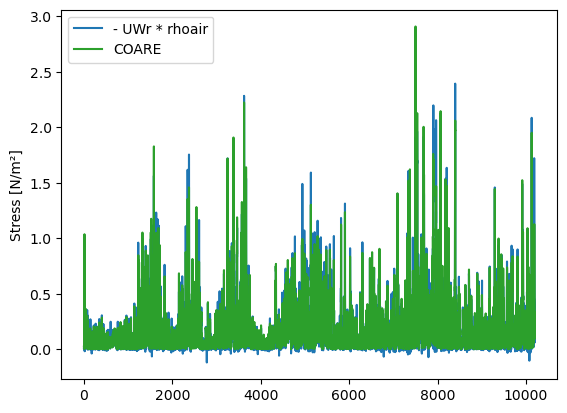

In [15]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

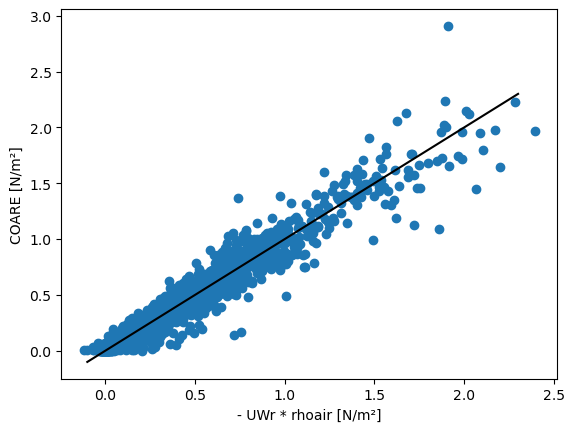

In [16]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

# Remove some extreme values

In [17]:
endurance_df = endurance_df[( (endurance_df['UWr'] >= -2) & (endurance_df['UWr'] <= 2) )]   
not_endurance_df = not_endurance_df[( (not_endurance_df['UWr'] >= -2) & (not_endurance_df['UWr'] <= 2) )]   

# Prepare features and labels

In [18]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10',
    'lat', 'lon'
]

In [19]:
x_train = not_endurance_df[predictor_variables]
x_train

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10,lat,lon
5656,-20.432520,-14.459695,-17.972080,-24.619999,-69.389999,-114.239998,60.049999,48.969997,60.129997,11.969228,-2.826045,40.1334,-70.7785
9435,-24.095652,-21.035065,-27.113739,51.779999,97.949997,143.970001,62.809998,51.439999,62.849998,6.831289,2.448052,40.1334,-70.7785
9077,-18.266819,-15.242393,-18.274836,-145.690002,-99.989998,-54.309998,50.209999,39.099998,50.099998,1.195844,-7.605927,44.6393,-124.3040
1416,-14.166916,-10.672799,-17.317947,56.149998,101.529999,146.800003,36.770000,27.449999,36.719997,2.349869,7.171412,40.1334,-70.7785
5024,-20.103991,-20.768648,-19.319605,-36.649998,-83.000000,-129.529999,61.629997,49.959999,61.509998,0.501095,-12.278543,-54.4041,-89.2069
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,-19.649080,-19.157484,-17.981960,115.669998,70.809998,25.910000,53.340000,42.250000,53.289997,1.464934,-11.676455,40.1334,-70.7785
2283,-22.848459,-16.476969,-19.476072,-24.299999,-69.070000,-113.919998,61.529999,50.469997,61.609997,9.488249,-0.378240,40.1334,-70.7785
2004,-9.051398,-8.167862,-9.167343,-25.119999,-69.879997,-114.639999,49.209999,38.469997,49.230000,-0.041923,-0.989270,44.6393,-124.3040
5032,-15.484493,-7.178390,-12.794005,-156.739990,-112.250000,-67.739998,37.000000,27.859999,37.040001,9.540525,0.357263,-54.4041,-89.2069


In [20]:
x_test = endurance_df[predictor_variables]
x_test

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10,lat,lon
7889,-14.538581,-14.780326,-18.753984,48.919998,95.389999,141.750000,63.799999,52.360001,63.840000,6.045154,7.037160,59.9337,-39.47378
8060,-11.722575,-10.061743,-16.086107,53.520000,99.360001,145.129990,52.219997,41.049999,52.250000,6.045154,7.037160,59.9337,-39.47378
8398,-11.369808,-7.177017,-12.423335,105.619995,60.939999,16.350000,49.279999,38.500000,49.169998,6.045154,7.037160,59.9337,-39.47378
6971,-15.608529,-16.861622,-19.606695,105.649994,60.969997,16.219999,50.680000,39.790001,50.639999,4.310946,-7.993226,59.9337,-39.47378
7134,-20.462420,-16.575378,-22.379761,105.589996,60.910000,16.330000,49.969997,39.129997,49.849998,7.542173,0.015852,59.9337,-39.47378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,-26.801231,-21.498396,-28.609531,-16.809999,-61.469997,-106.299995,47.779999,37.149998,47.869999,1.227476,-2.527763,59.9337,-39.47378
7798,-12.169643,-8.584421,-12.645116,109.139999,64.349998,19.400000,36.820000,27.549999,36.799999,6.045154,7.037160,59.9337,-39.47378
7519,-16.971136,-9.974168,-12.500629,-17.770000,-62.469997,-107.119995,43.879997,33.660000,43.879997,10.109268,0.168600,59.9337,-39.47378
9613,-33.109863,-32.367168,-34.887600,53.180000,99.220001,145.119995,54.219997,42.879997,54.230000,-1.705126,0.671940,59.9337,-39.47378


In [21]:
y_train = - not_endurance_df['UWr'] * not_endurance_df['rhoair']
y_train

5656    0.256120
9435    0.102775
9077    0.061373
1416    0.100973
5024    0.203416
          ...   
1317    0.255158
2283    0.157549
2004    0.004989
5032    0.274613
607     0.045052
Length: 5945, dtype: float64

In [22]:
y_test = - endurance_df['UWr'] * endurance_df['rhoair']
y_test

7889    0.643577
8060    0.916692
8398    1.623154
6971    0.147628
7134    0.008829
          ...   
3944    0.002848
7798    0.108883
7519    0.276812
9613    0.004920
3234    0.162361
Length: 4255, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [23]:
c_train = not_endurance_df['stress']
c_test = endurance_df['stress']

In [24]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [25]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [26]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [27]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-06-01 12:51:07.943803: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-01 12:51:07.944083: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-01 12:51:07.944092: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-01 12:51:07.944110: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-1l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-06-01 12:51:07.944314: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
131/131 [==============================] - 1s 3ms/step - loss: 5.7232 - mean_absolute_error: 1.7326 - val_loss: 6.0766 - val_mean_absolute_error: 1.4242
Epoch 2/500
131/131 [==============================] - 0s 709us/step - loss: 3.0737 - mean_absolute_error: 1.3557 - val_loss: 5.6815 - val_mean_absolute_error: 1.1271
Epoch 3/500
131/131 [==============================] - 0s 646us/step - loss: 2.6454 - mean_absolute_error: 1.0612 - val_loss: 5.8005 - val_mean_absolute_error: 0.9162
Epoch 4/500
131/131 [==============================] - 0s 637us/step - loss: 2.7953 - mean_absolute_error: 0.8737 - val_loss: 6.1976 - val_mean_absolute_error: 0.7913
Epoch 5/500
131/131 [==============================] - 0s 628us/step - loss: 1.0934 - mean_absolute_error: 0.7196 - val_loss: 6.6805 - val_mean_absolute_error: 0.7263
Epoch 6/500
131/131 [==============================] - 0s 616us/step - loss: 2.3891 - mean_absolute_error: 0.6873 - val_loss: 7.1007 - val_mean_absolute_error: 0.6949


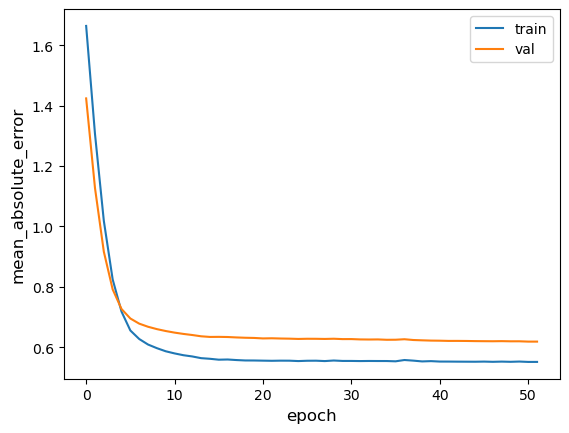

133/133 [==============================] - 0s 311us/step - loss: 1.7690 - mean_absolute_error: 0.7162
Test accuracy 0.7162033319473267
Test loss 1.7690244913101196


In [28]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [29]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [30]:
np.mean(y_test)

0.2035476342526983

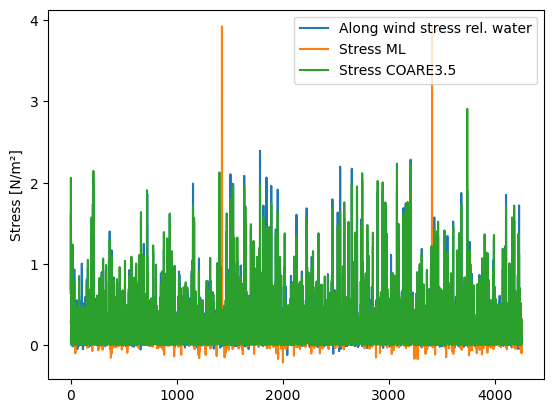

In [31]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

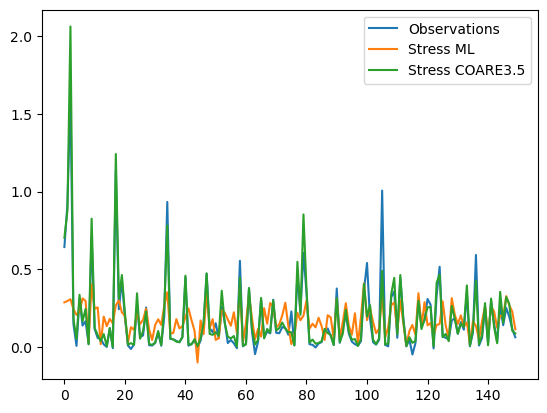

In [32]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

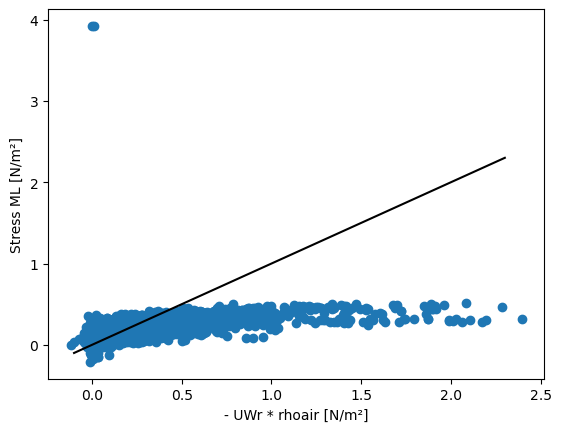

In [33]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

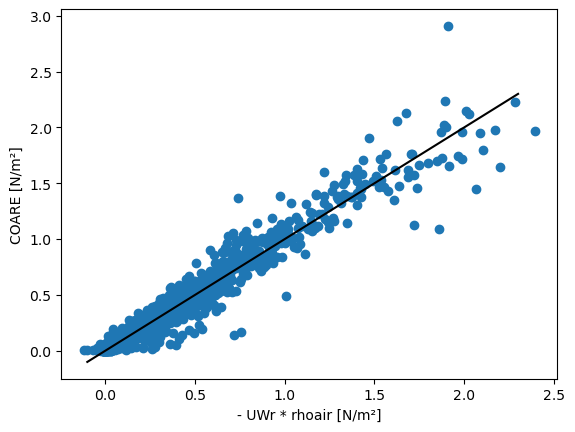

In [34]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [35]:
rmse(y_test.values, y_test_pred)

0.3177229610404804

In [36]:
rmse(y_test.values, c_test)

0.06185254792299451

## Correlation

In [37]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.50705904],
       [0.50705904, 1.        ]])

In [38]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

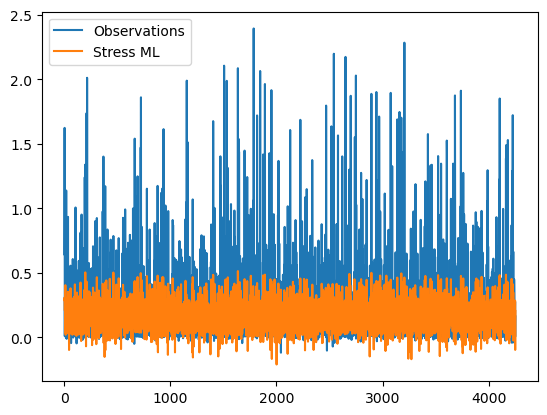

In [39]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.65194248],
       [0.65194248, 1.        ]])

In [41]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97760944],
       [0.97760944, 1.        ]])

In [42]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.3073763276895735

# Other experiments

In [43]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [44]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [45]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
131/131 [==============================] - 1s 2ms/step - loss: 1.5327 - mean_absolute_error: 0.9131 - val_loss: 1.2348 - val_mean_absolute_error: 0.7512
Epoch 2/500
131/131 [==============================] - 0s 794us/step - loss: 1.1248 - mean_absolute_error: 0.7215 - val_loss: 1.0494 - val_mean_absolute_error: 0.6699
Epoch 3/500
131/131 [==============================] - 0s 754us/step - loss: 0.9232 - mean_absolute_error: 0.6621 - val_loss: 0.9015 - val_mean_absolute_error: 0.6178
Epoch 4/500
131/131 [==============================] - 0s 758us/step - loss: 0.8432 - mean_absolute_error: 0.6052 - val_loss: 0.7860 - val_mean_absolute_error: 0.5653
Epoch 5/500
131/131 [==============================] - 0s 742us/step - loss: 0.7607 - mean_absolute_error: 0.5748 - val_loss: 0.6988 - val_mean_absolute_error: 0.5186
Epoch 6/500
131/131 [==============================] - 0s 766us/step - loss: 0.6816 - mean_absolute_error: 0.5390 - val_loss: 0.6271 - val_mean_absolute_error: 0.4892


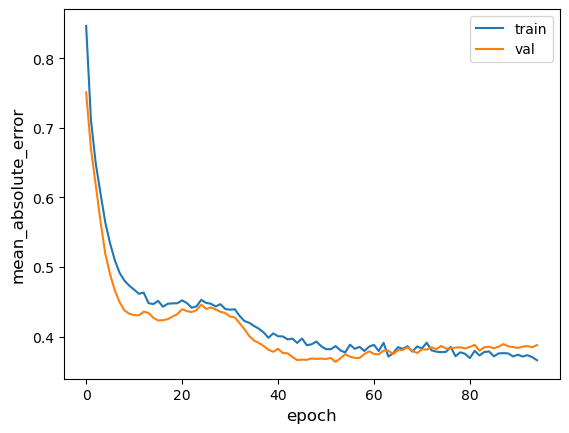

133/133 [==============================] - 0s 302us/step - loss: 1.1629 - mean_absolute_error: 0.6500
Test accuracy 0.6499983072280884
Test loss 1.162887692451477


In [46]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [47]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

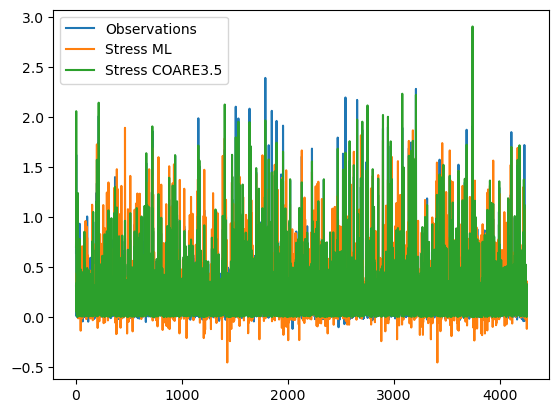

In [48]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

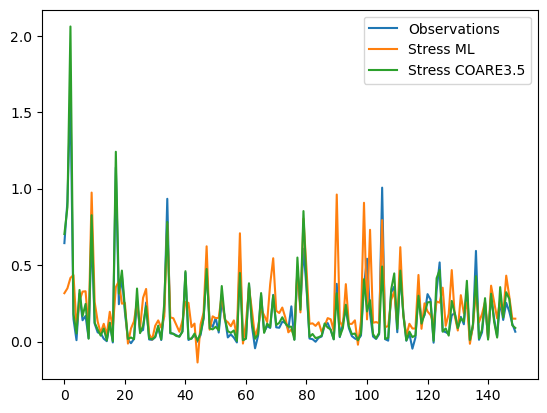

In [49]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [50]:
rmse(y_test.values, y_test_pred)

0.4083419078249019

## Correlation

In [51]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.76405054],
       [0.76405054, 1.        ]])

In [52]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

In [53]:
y_test.values.shape

(4255,)

In [54]:
y_test_pred[:, 0].shape

(4255,)

In [55]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [56]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.64357658, 0.91669229, 1.62315359, ..., 0.27681187, 0.00492041,
       0.16236108])

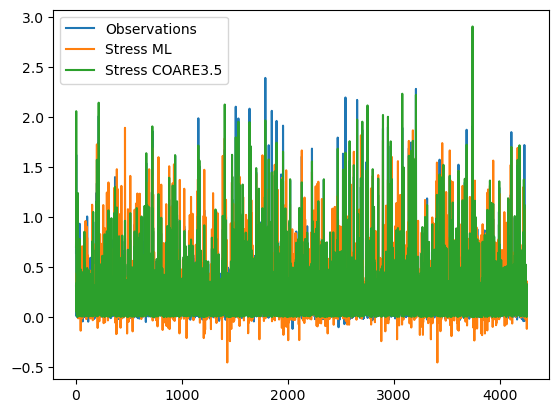

In [57]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

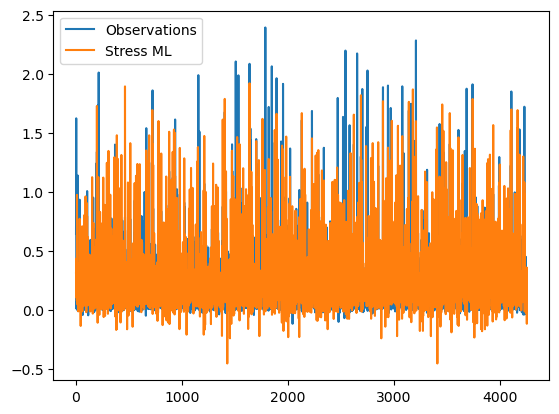

In [58]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [59]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

In [60]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.4083419078249019

Text(0, 0.5, 'Stress ML [N/m²]')

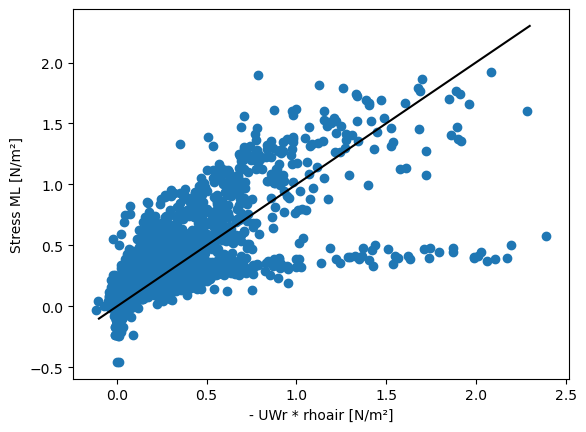

In [61]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [62]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [63]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [64]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 0s 2ms/step - loss: 1.3316 - mean_absolute_error: 0.8500 - val_loss: 1.1685 - val_mean_absolute_error: 0.6304
Epoch 2/500
66/66 [==============================] - 0s 975us/step - loss: 0.9449 - mean_absolute_error: 0.7089 - val_loss: 0.9590 - val_mean_absolute_error: 0.5726
Epoch 3/500
66/66 [==============================] - 0s 976us/step - loss: 0.8332 - mean_absolute_error: 0.6517 - val_loss: 0.8048 - val_mean_absolute_error: 0.5295
Epoch 4/500
66/66 [==============================] - 0s 958us/step - loss: 0.7572 - mean_absolute_error: 0.6142 - val_loss: 0.6901 - val_mean_absolute_error: 0.4820
Epoch 5/500
66/66 [==============================] - 0s 962us/step - loss: 0.6871 - mean_absolute_error: 0.5776 - val_loss: 0.6306 - val_mean_absolute_error: 0.4617
Epoch 6/500
66/66 [==============================] - 0s 947us/step - loss: 0.7190 - mean_absolute_error: 0.5613 - val_loss: 0.5776 - val_mean_absolute_error: 0.4428
Epoch 7/500


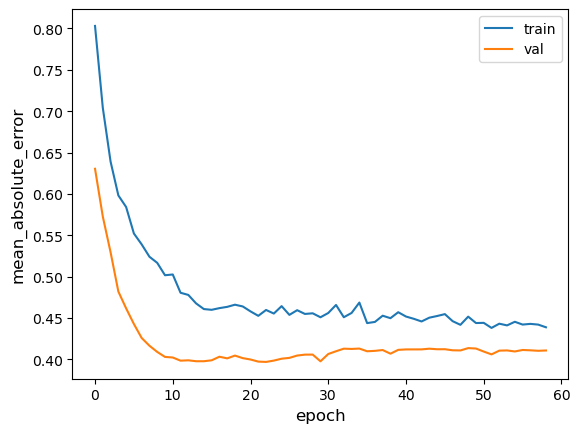

133/133 [==============================] - 0s 340us/step - loss: 1.1482 - mean_absolute_error: 0.5985
Test accuracy 0.5985183119773865
Test loss 1.1482093334197998


In [65]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [66]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [67]:
rmse(y_test.values, y_test_pred)

0.32668593475205504

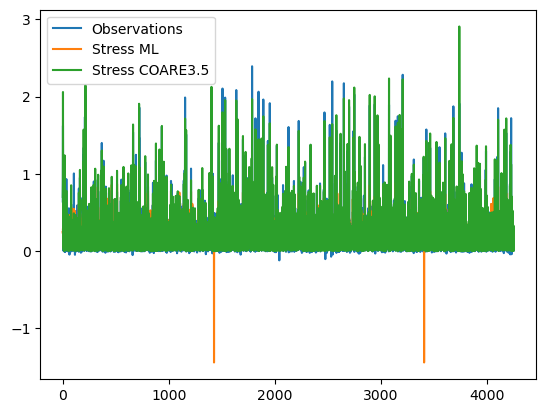

In [68]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

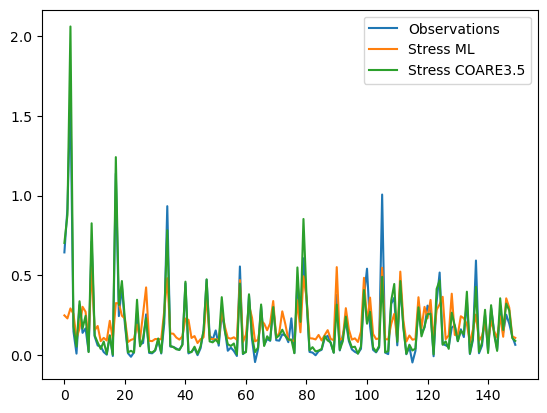

In [69]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

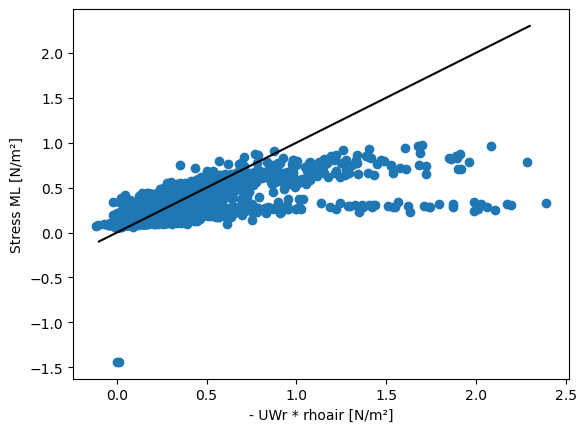

In [70]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [71]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.74193137],
       [0.74193137, 1.        ]])

In [72]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

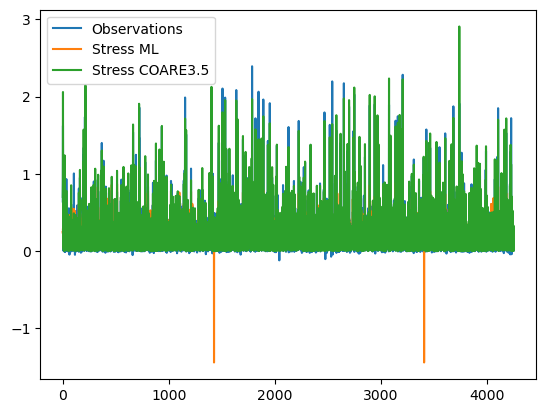

In [73]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

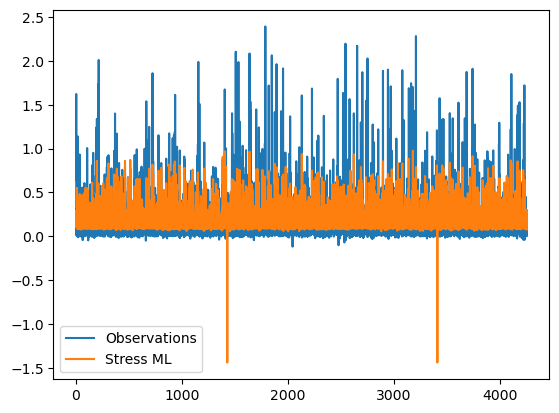

In [74]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [75]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

In [76]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.32668593475205504

Text(0, 0.5, 'Stress ML [N/m²]')

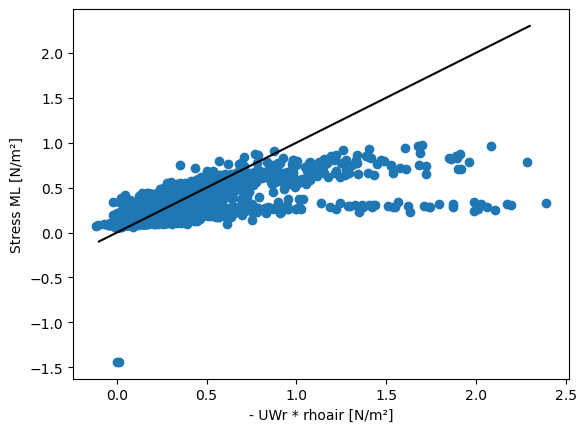

In [77]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

# Best model

In [78]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [79]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [80]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
9/9 [==============================] - 1s 46ms/step - loss: 9.4581 - mean_absolute_error: 2.1707 - val_loss: 0.8294 - val_mean_absolute_error: 0.6380
Epoch 2/500
9/9 [==============================] - 0s 29ms/step - loss: 1.5764 - mean_absolute_error: 0.9649 - val_loss: 0.7483 - val_mean_absolute_error: 0.5875
Epoch 3/500
9/9 [==============================] - 0s 30ms/step - loss: 1.1384 - mean_absolute_error: 0.8162 - val_loss: 0.8261 - val_mean_absolute_error: 0.5563
Epoch 4/500
9/9 [==============================] - 0s 29ms/step - loss: 0.9019 - mean_absolute_error: 0.7191 - val_loss: 0.8980 - val_mean_absolute_error: 0.5553
Epoch 5/500
9/9 [==============================] - 0s 30ms/step - loss: 0.7635 - mean_absolute_error: 0.6546 - val_loss: 0.9500 - val_mean_absolute_error: 0.5687
Epoch 6/500
9/9 [==============================] - 0s 29ms/step - loss: 0.7096 - mean_absolute_error: 0.6293 - val_loss: 1.0912 - val_mean_absolute_error: 0.5996
Epoch 7/500
9/9 [===========

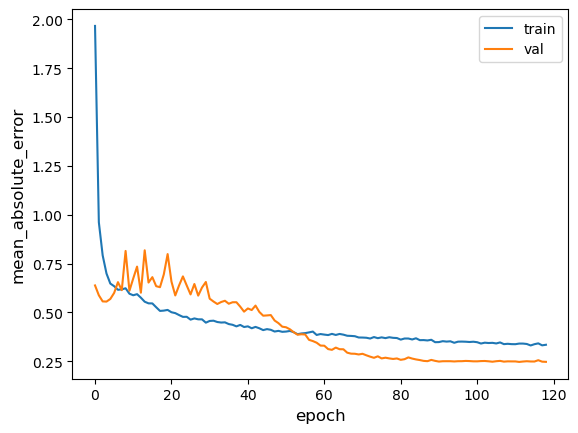

133/133 [==============================] - 0s 2ms/step - loss: 1.0322 - mean_absolute_error: 0.5428
Test accuracy 0.5427954792976379
Test loss 1.0322014093399048


In [81]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [82]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [83]:
rmse(y_test.values, y_test_pred)

0.3794536937240852

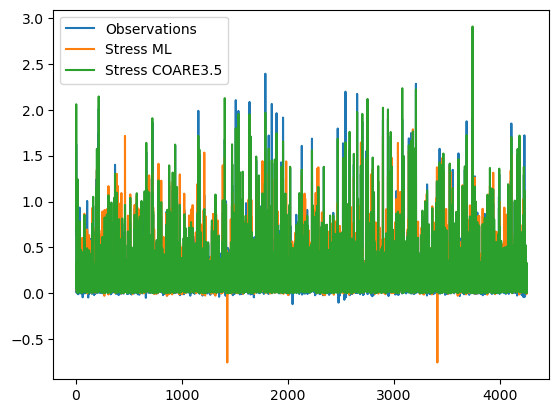

In [84]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

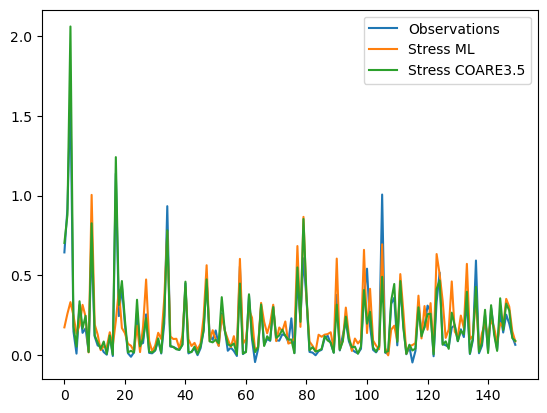

In [85]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [86]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.75646566],
       [0.75646566, 1.        ]])

In [87]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

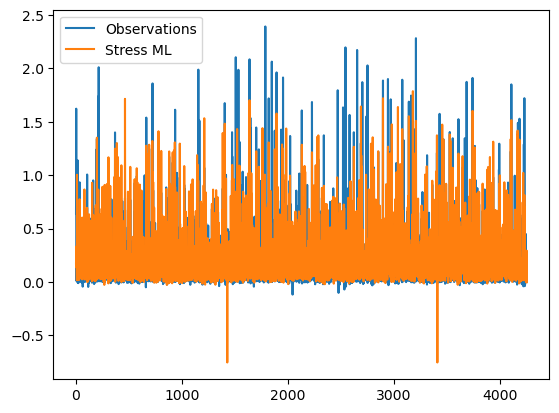

In [88]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [89]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

In [90]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3794536937240852

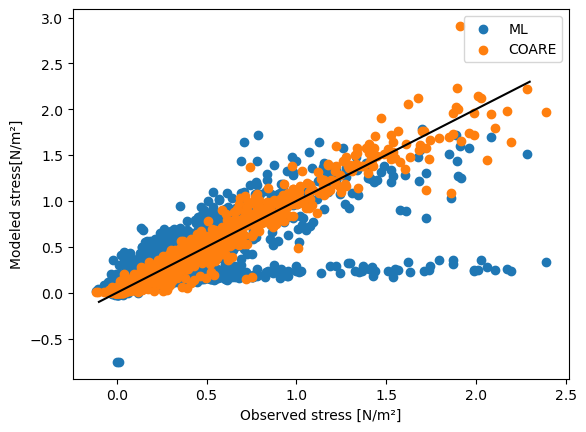

In [91]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

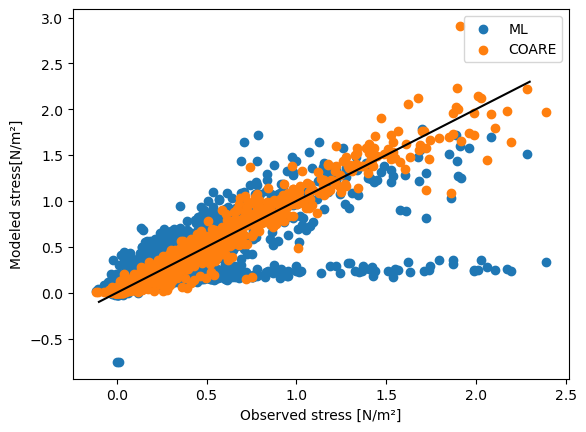

In [92]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [93]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [94]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [95]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
5/5 [==============================] - 1s 145ms/step - loss: 21.6047 - mean_absolute_error: 2.9919 - val_loss: 0.8222 - val_mean_absolute_error: 0.6375
Epoch 2/500
5/5 [==============================] - 1s 112ms/step - loss: 3.0088 - mean_absolute_error: 1.3312 - val_loss: 0.9089 - val_mean_absolute_error: 0.6263
Epoch 3/500
5/5 [==============================] - 1s 111ms/step - loss: 1.4789 - mean_absolute_error: 0.9385 - val_loss: 1.3074 - val_mean_absolute_error: 0.6103
Epoch 4/500
5/5 [==============================] - 1s 108ms/step - loss: 1.1918 - mean_absolute_error: 0.8085 - val_loss: 0.7921 - val_mean_absolute_error: 0.5894
Epoch 5/500
5/5 [==============================] - 1s 106ms/step - loss: 1.0505 - mean_absolute_error: 0.7840 - val_loss: 0.7065 - val_mean_absolute_error: 0.5539
Epoch 6/500
5/5 [==============================] - 1s 112ms/step - loss: 0.9523 - mean_absolute_error: 0.7491 - val_loss: 0.9121 - val_mean_absolute_error: 0.6257
Epoch 7/500
5/5 [====

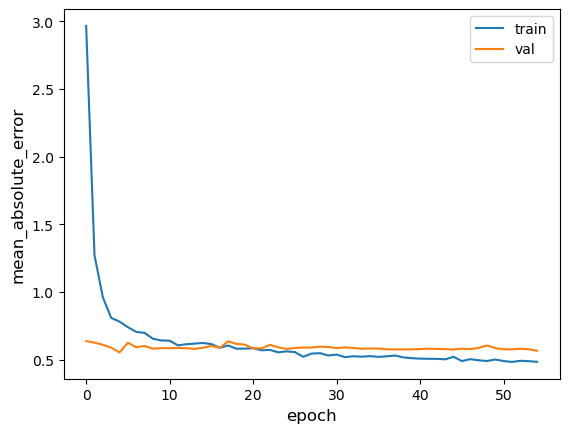

133/133 [==============================] - 1s 7ms/step - loss: 2.6431 - mean_absolute_error: 0.8644
Test accuracy 0.8644292950630188
Test loss 2.643132209777832


In [96]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [97]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [98]:
rmse(y_test.values, y_test_pred)

0.31381439440409753

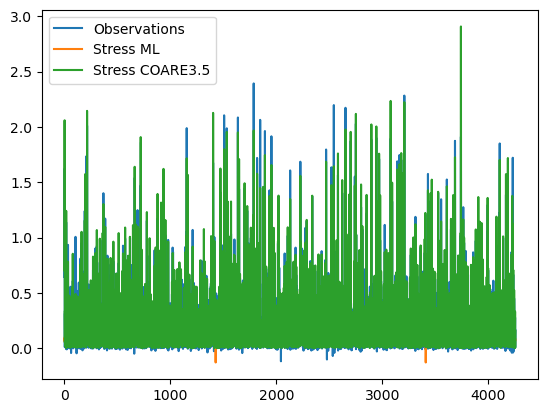

In [99]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

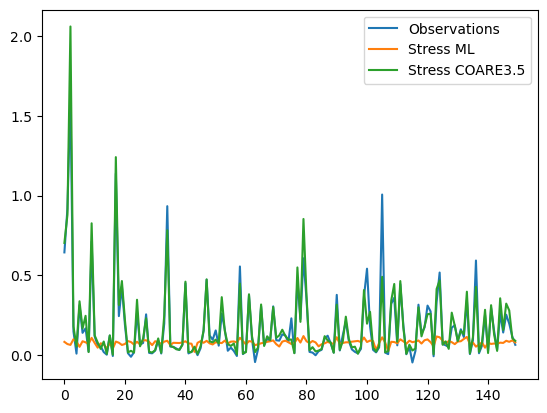

In [100]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [101]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.47784322],
       [0.47784322, 1.        ]])

In [102]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

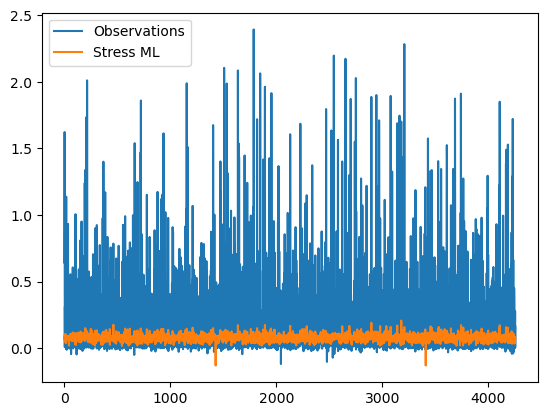

In [103]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [104]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

In [105]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.31381439440409753

Text(0, 0.5, 'Stress ML [N/m²]')

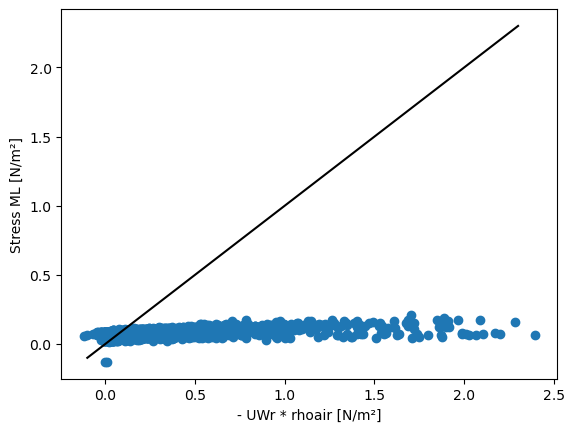

In [106]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [107]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [108]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [109]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 2s 456ms/step - loss: 17.8485 - mean_absolute_error: 2.7902 - val_loss: 0.9849 - val_mean_absolute_error: 0.7080
Epoch 2/1000
3/3 [==============================] - 1s 382ms/step - loss: 3.7983 - mean_absolute_error: 1.5024 - val_loss: 0.9283 - val_mean_absolute_error: 0.6044
Epoch 3/1000
3/3 [==============================] - 1s 377ms/step - loss: 2.0233 - mean_absolute_error: 1.0789 - val_loss: 0.7865 - val_mean_absolute_error: 0.5727
Epoch 4/1000
3/3 [==============================] - 1s 375ms/step - loss: 1.7909 - mean_absolute_error: 1.0327 - val_loss: 0.6888 - val_mean_absolute_error: 0.5330
Epoch 5/1000
3/3 [==============================] - 1s 381ms/step - loss: 2.1065 - mean_absolute_error: 1.1237 - val_loss: 1.6144 - val_mean_absolute_error: 0.8598
Epoch 6/1000
3/3 [==============================] - 1s 374ms/step - loss: 1.4629 - mean_absolute_error: 0.9365 - val_loss: 2.1803 - val_mean_absolute_error: 1.1102
Epoch 7/1000
3/

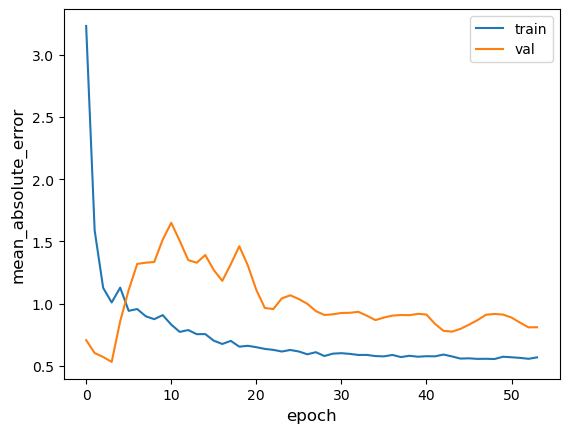

133/133 [==============================] - 3s 25ms/step - loss: 3.4511 - mean_absolute_error: 1.1064
Test accuracy 1.1063792705535889
Test loss 3.4511196613311768


In [110]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [111]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [112]:
rmse(y_test.values, y_test_pred)

0.35407982036327146

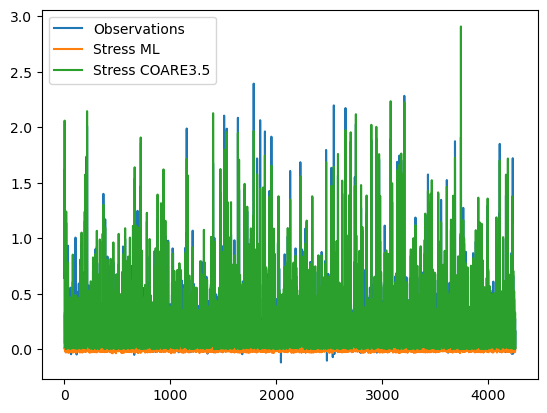

In [113]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

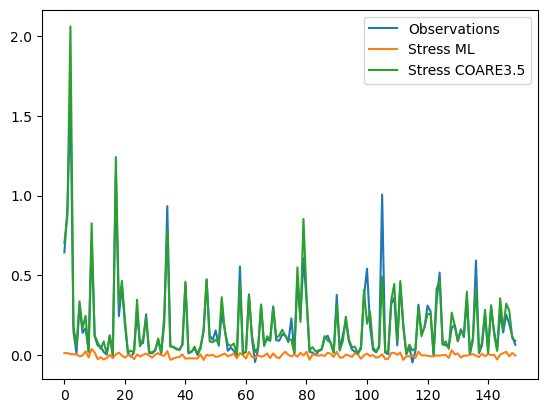

In [114]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [115]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.41378327],
       [0.41378327, 1.        ]])

In [116]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

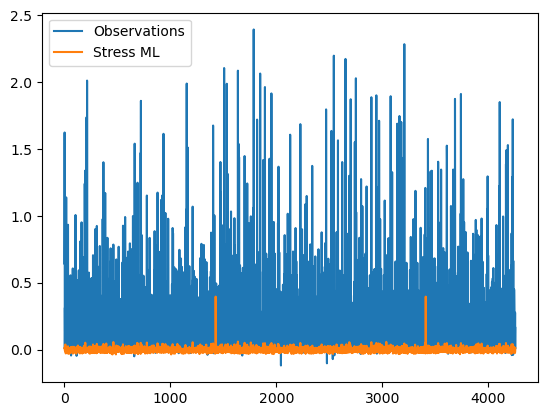

In [117]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [118]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

In [119]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.35407982036327146

Text(0, 0.5, 'Stress ML [N/m²]')

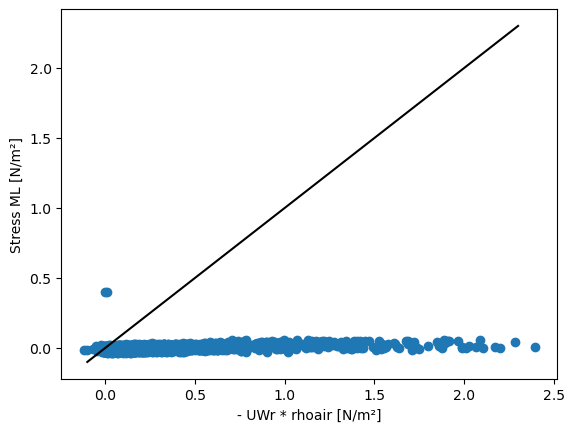

In [120]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [121]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [122]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [123]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 421ms/step - loss: 20.6744 - mean_absolute_error: 2.9845 - val_loss: 1.4228 - val_mean_absolute_error: 0.8776
Epoch 2/1000
3/3 [==============================] - 1s 365ms/step - loss: 3.7934 - mean_absolute_error: 1.5149 - val_loss: 0.7204 - val_mean_absolute_error: 0.5826
Epoch 3/1000
3/3 [==============================] - 1s 354ms/step - loss: 2.5490 - mean_absolute_error: 1.2100 - val_loss: 0.8020 - val_mean_absolute_error: 0.6067
Epoch 4/1000
3/3 [==============================] - 1s 350ms/step - loss: 1.8808 - mean_absolute_error: 1.0285 - val_loss: 1.1929 - val_mean_absolute_error: 0.6907
Epoch 5/1000
3/3 [==============================] - 1s 346ms/step - loss: 1.9862 - mean_absolute_error: 1.0869 - val_loss: 2.5353 - val_mean_absolute_error: 0.8678
Epoch 6/1000
3/3 [==============================] - 1s 355ms/step - loss: 1.9503 - mean_absolute_error: 0.9413 - val_loss: 2.3092 - val_mean_absolute_error: 1.2227
Epoch 7/1000
3/

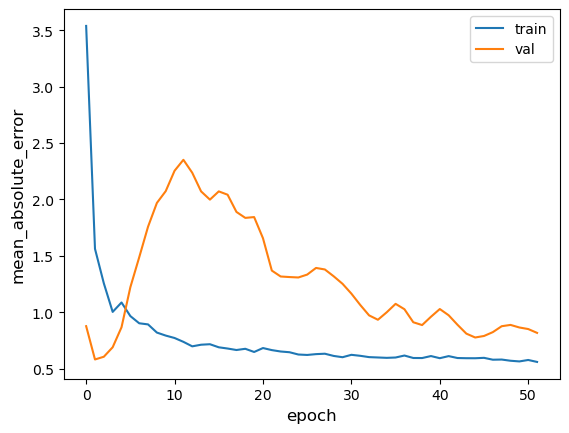

133/133 [==============================] - 3s 25ms/step - loss: 3.2722 - mean_absolute_error: 1.0598
Test accuracy 1.0597883462905884
Test loss 3.272188901901245


In [124]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [125]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [126]:
rmse(y_test.values, y_test_pred)

0.3487363183869261

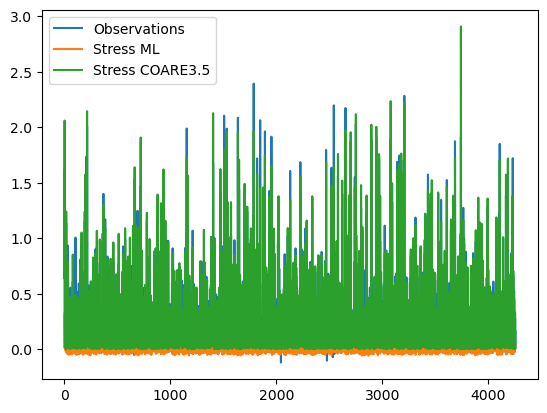

In [127]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

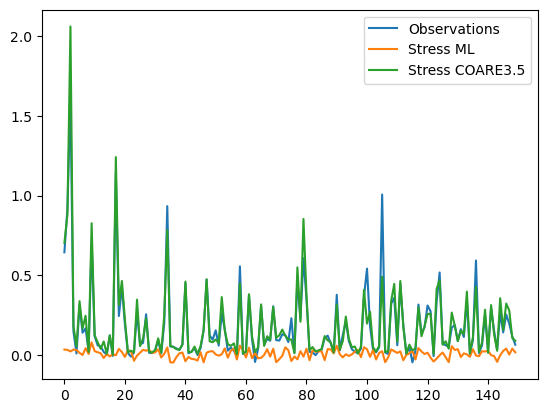

In [128]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [129]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.40913118],
       [0.40913118, 1.        ]])

In [130]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

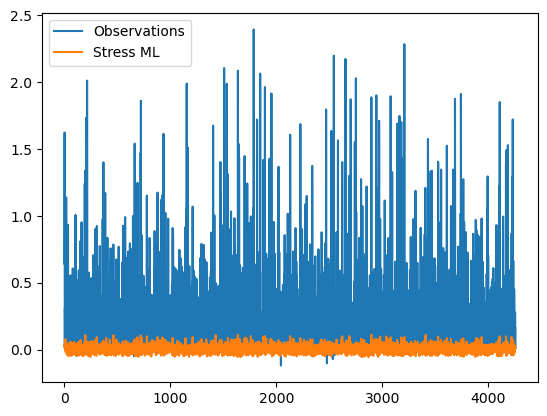

In [131]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [132]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

In [133]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3487363183869261

Text(0, 0.5, 'Stress ML [N/m²]')

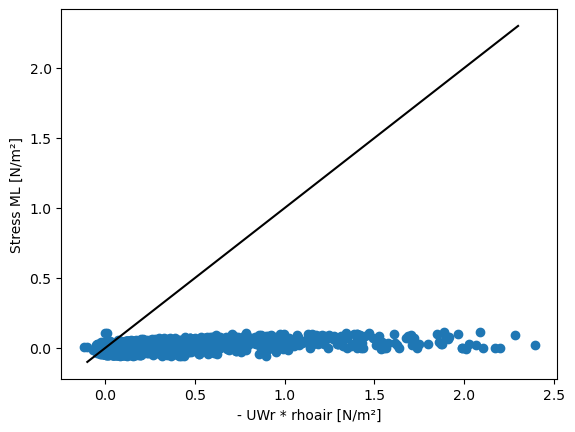

In [134]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [135]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [136]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [137]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 2s 446ms/step - loss: 16.9051 - mean_absolute_error: 2.7581 - val_loss: 1.2478 - val_mean_absolute_error: 0.7343
Epoch 2/1000
3/3 [==============================] - 1s 380ms/step - loss: 4.2609 - mean_absolute_error: 1.5520 - val_loss: 0.9968 - val_mean_absolute_error: 0.6680
Epoch 3/1000
3/3 [==============================] - 1s 363ms/step - loss: 3.3274 - mean_absolute_error: 1.1054 - val_loss: 2.8961 - val_mean_absolute_error: 0.6851
Epoch 4/1000
3/3 [==============================] - 1s 374ms/step - loss: 1.7029 - mean_absolute_error: 0.9334 - val_loss: 1.6672 - val_mean_absolute_error: 0.5569
Epoch 5/1000
3/3 [==============================] - 1s 371ms/step - loss: 1.5990 - mean_absolute_error: 0.9608 - val_loss: 1.0318 - val_mean_absolute_error: 0.6768
Epoch 6/1000
3/3 [==============================] - 1s 383ms/step - loss: 1.7684 - mean_absolute_error: 0.9984 - val_loss: 0.9645 - val_mean_absolute_error: 0.5731
Epoch 7/1000
3/

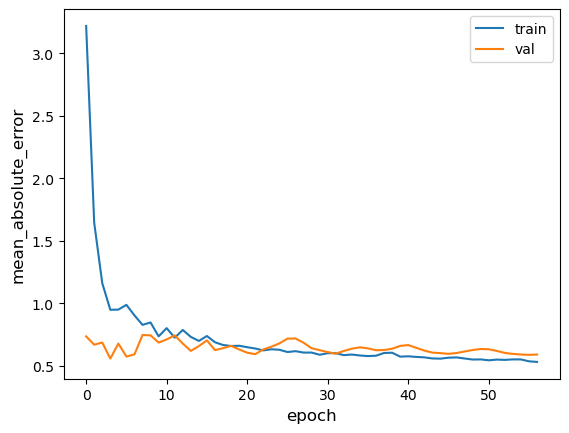

133/133 [==============================] - 3s 25ms/step - loss: 11.5640 - mean_absolute_error: 1.6788
Test accuracy 1.6787505149841309
Test loss 11.563989639282227


In [138]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [139]:
y_test_pred = multi_dense_model.predict(x_test)

In [140]:
rmse(y_test.values, y_test_pred)

3.4329069018989693

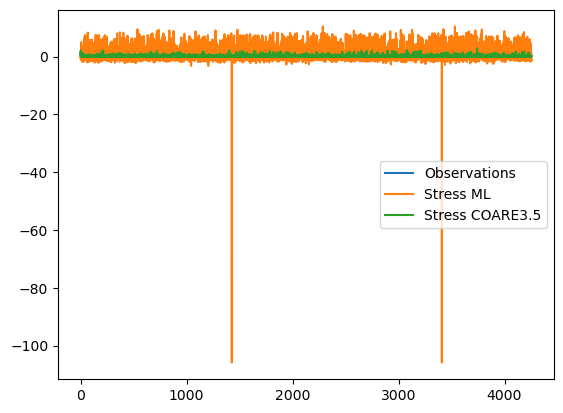

In [141]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

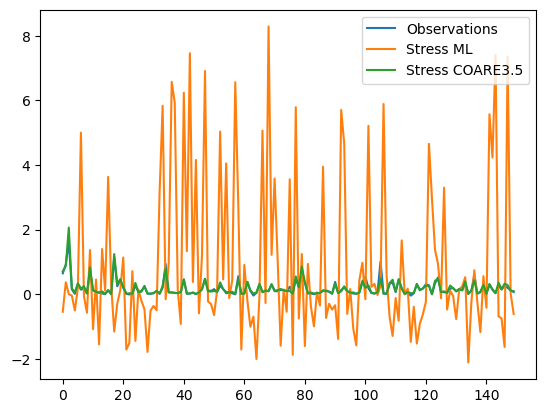

In [142]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [143]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.1145147],
       [0.1145147, 1.       ]])

In [144]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97761432],
       [0.97761432, 1.        ]])

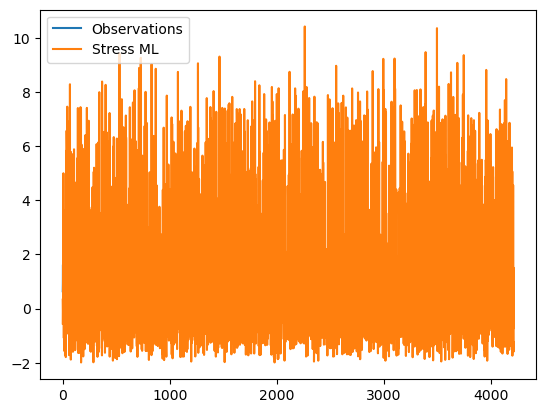

In [145]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [146]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97753504],
       [0.97753504, 1.        ]])

In [147]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

2.549871841229632

Text(0, 0.5, 'Stress ML [N/m²]')

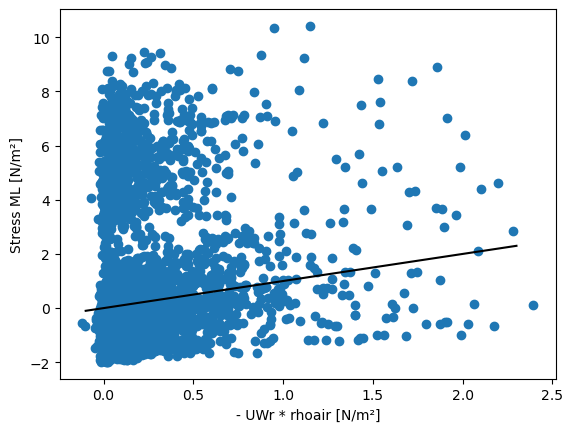

In [148]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 